#Week2 機械学習のための数学

##●二次元配列と勾配問題


###【問題1】1次関数
x
 が-50から50の範囲で次の式を考えます。


y
=
1/2
x
+
1

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [17]:
import numpy as np

#np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)    #指数表示：無し
#np.set_printoptions(threshold=np.inf)   #print表示での配列の省略：無し
np.set_printoptions(threshold=100)   #print表示での配列の省略：有り（閾値=100）

x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = (1 / 2) * x_ndarray + 1

print("x_ndarray=\n{}".format(x_ndarray))
print("y_ndarray=\n{}".format(y_ndarray))


x_ndarray=
[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
y_ndarray=
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


###【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [2]:
x_y_ndarray = np.stack([x_ndarray, y_ndarray], axis = 1)
print("x_y_ndarray=\n{}".format(x_y_ndarray))
print("shape=\n{}".format(x_y_ndarray.shape))


x_y_ndarray=
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
shape=
(1001, 2)


###【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [3]:
x_variation_ndarray = x_ndarray[1:] - x_ndarray[:-1]    #xの変化量の配列
y_variation_ndarray = y_ndarray[1:] - y_ndarray[:-1]    #yの変化量の配列

grad_ndarray = y_variation_ndarray / x_variation_ndarray    #各x座標における勾配
print("各x座標における勾配:\n{}".format(grad_ndarray))

各x座標における勾配:
[0.5 0.5 0.5 ... 0.5 0.5 0.5]


###【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

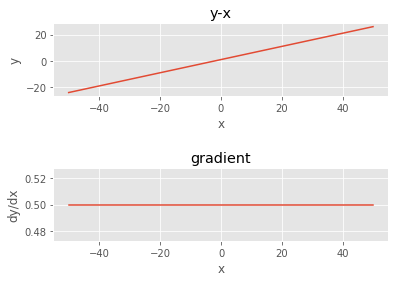

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

#サブプロット作成
fig, ax = plt.subplots(2)

#グラフ間の間隔を空ける
fig.subplots_adjust(wspace=0.4, hspace=1)

#1次関数のグラフ作成
ax[0].set_title("y-x")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].plot(x_ndarray, y_ndarray)

#勾配のグラフ作成
ax[1].set_title("gradient")
ax[1].set_xlabel("x")
ax[1].set_ylabel("dy/dx")
ax[1].plot(x_ndarray[0:-1], grad_ndarray)
plt.show()

###【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。


y
=
x
2
(
−
50
≤
x
≤
50
)
y
=
2
x
2
+
2
x
(
−
50
≤
x
≤
50
)
y
=
s
i
n
(
x
1
2
)
(
0
≤
x
≤
50
)

また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。



### 関数1 ###
xy_ndarray=
[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 ...
 [  49.8  2480.04]
 [  49.9  2490.01]
 [  50.   2500.  ]]
shape: (1001, 2)
各x座標における勾配:
[-99.9 -99.7 -99.5 ...  99.5  99.7  99.9]


### 関数2 ###
xy_ndarray=
[[-5.000000e+01  5.000000e+03]
 [-4.990000e+01  4.980020e+03]
 [-4.980000e+01  4.960080e+03]
 ...
 [ 4.980000e+01  9.801528e+14]
 [ 4.990000e+01  1.050502e+15]
 [ 5.000000e+01  1.125900e+15]]
shape: (1001, 2)
各x座標における勾配:
[-1.998000e+02 -1.994000e+02 -1.990000e+02 ...  6.563790e+14  7.034896e+14
  7.539815e+14]


### 関数3 ###
xy_ndarray=
[[ 0.        0.      ]
 [ 0.1       0.310984]
 [ 0.2       0.432455]
 ...
 [49.8       0.698805]
 [49.9       0.703854]
 [50.        0.708861]]
shape: (501, 2)
各x座標における勾配:
[3.109836 1.214712 0.882895 ... 0.050882 0.050481 0.050078]


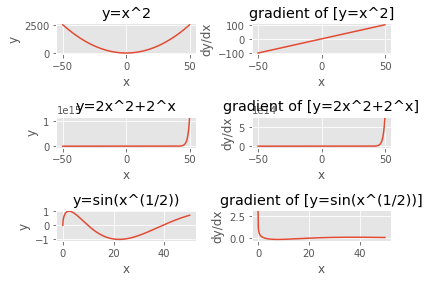

In [47]:
def compute_gradient(arg_function, arg_x_range=(-50, 50.1, 0.1)):
    '''
    #Description
        変化量を使い勾配を計算する。
    #Parameters
        arg_function:    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。(function)
        arg_x_range:   np.arange()の引数と同じ方法で範囲を指定する。(tuple)
    #Returns
        ret_xy_ndarray:     xとyを結合したもの。nはx_rangeに依存する。(ndarray, shape(n, 2))
        ret_gradient_ndarray:     関数の勾配。差をとるため要素は1つ減る。(ndarray, shape(n-1,))
    '''
    temp_x_ndarray = np.arange(*arg_x_range)   #x座標の配列
    temp_y_ndarray = arg_function(temp_x_ndarray)   #y座標の配列

    #xとyを結合（問題2より抜粋）
    ret_xy_ndarray = np.stack([temp_x_ndarray, temp_y_ndarray], axis = 1)
    print("xy_ndarray=\n{}".format(ret_xy_ndarray))
    print("shape: {}".format(ret_xy_ndarray.shape))

    #勾配を計算（問題3より抜粋）
    temp_x_variation_ndarray = temp_x_ndarray[1:] - temp_x_ndarray[:-1]    #xの変化量の配列
    temp_y_variation_ndarray = temp_y_ndarray[1:] - temp_y_ndarray[:-1]    #yの変化量の配列
    ret_gradient_ndarray = temp_y_variation_ndarray / temp_x_variation_ndarray    #各x座標における勾配
    print("各x座標における勾配:\n{}".format(ret_gradient_ndarray))
    
    return ret_xy_ndarray, ret_gradient_ndarray


def function1(arg_x_ndarray):
    '''
    #Description
        「y = x^2」の演算
    #Parameters
        arg_x_ndarray:    上記関数の入力x
    #Returns
        ret_y_ndarray:    上記関数の出力y
    '''
    #ret_y_ndarray = (1 / 2) * arg_x_ndarray + 1
    ret_y_ndarray = arg_x_ndarray ** 2
    return ret_y_ndarray


def function2(arg_x_ndarray):
    '''
    #Description
        「y = 2x^2 + 2^x」の演算
    #Parameters
        arg_x_ndarray:    上記関数の入力x
    #Returns
        ret_y_ndarray:    上記関数の出力y
    '''
    ret_y_ndarray = 2 * (arg_x_ndarray ** 2) + (2 ** arg_x_ndarray)
    return ret_y_ndarray


def function3(arg_x_ndarray):
    '''
    #Description
        「y = sin(x^(1/2))」の演算
    #Parameters
        arg_x_ndarray:    上記関数の入力x
    #Returns
        ret_y_ndarray:    上記関数の出力y
    '''
    ret_y_ndarray = np.sin(arg_x_ndarray ** (1/2))
    return ret_y_ndarray

#np.set_printoptions(threshold=np.inf)   #print表示での配列の省略：無し
np.set_printoptions(threshold=100)   #print表示での配列の省略：有り（閾値=100）

print("\n")
print("### 関数1 ###")
xy1_ndarray, gradient1_ndarray = compute_gradient(function1, (-50, 50.1, 0.1))
print("\n")
print("### 関数2 ###")
xy2_ndarray, gradient2_ndarray = compute_gradient(function2, (-50, 50.1, 0.1))
print("\n")
print("### 関数3 ###")
xy3_ndarray, gradient3_ndarray = compute_gradient(function3, (0, 50.1, 0.1))


#サブプロット作成
fig2, ax2 = plt.subplots(3, 2)

#グラフ間の間隔を空ける
fig2.subplots_adjust(wspace=0.4, hspace=2)

#関数1のグラフ作成
ax2[0][0].set_title("y=x^2")
ax2[0][0].set_xlabel("x")
ax2[0][0].set_ylabel("y")
ax2[0][0].plot(xy1_ndarray[:, 0], xy1_ndarray[:, 1])
#関数1の勾配のグラフ作成
ax2[0][1].set_title("gradient of [y=x^2]")
ax2[0][1].set_xlabel("x")
ax2[0][1].set_ylabel("dy/dx")
ax2[0][1].plot(xy1_ndarray[0:-1, 0], gradient1_ndarray)

#関数2のグラフ作成
ax2[1][0].set_title("y=2x^2+2^x")
ax2[1][0].set_xlabel("x")
ax2[1][0].set_ylabel("y")
ax2[1][0].plot(xy2_ndarray[:, 0], xy2_ndarray[:, 1])
#関数2の勾配のグラフ作成
ax2[1][1].set_title("gradient of [y=2x^2+2^x]")
ax2[1][1].set_xlabel("x")
ax2[1][1].set_ylabel("dy/dx")
ax2[1][1].plot(xy2_ndarray[0:-1, 0], gradient2_ndarray)

#関数3のグラフ作成
ax2[2][0].set_title("y=sin(x^(1/2))")
ax2[2][0].set_xlabel("x")
ax2[2][0].set_ylabel("y")
ax2[2][0].plot(xy3_ndarray[:, 0], xy3_ndarray[:, 1])
#関数3の勾配のグラフ作成
ax2[2][1].set_title("gradient of [y=sin(x^(1/2))]")
ax2[2][1].set_xlabel("x")
ax2[2][1].set_ylabel("dy/dx")
ax2[2][1].plot(xy3_ndarray[0:-1, 0], gradient3_ndarray)
plt.show()


###【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

In [49]:
#print(xy1_ndarray.min(axis=0))
#print(xy1_ndarray.argmin(axis=0))

#関数1
min_of_xy1_index = int(xy1_ndarray.argmin(axis=0)[1])
min_of_xy1 = xy1_ndarray.min(axis=0)[1]
print("\n")
print("####関数1###")
print("yの最小値: {}".format(min_of_xy1))
print("yの最小値のindex: {}".format(min_of_xy1_index))
print("最小値の前後の勾配:")
print("  ([index, 勾配])")
print("   [{}, {}]".format(min_of_xy1_index - 1, gradient1_ndarray[min_of_xy1_index - 1]))
print("   [{}, {}]".format(min_of_xy1_index, gradient1_ndarray[min_of_xy1_index]))
print("   [{}, {}]".format(min_of_xy1_index + 1, gradient1_ndarray[min_of_xy1_index + 1]))

#関数2
min_of_xy2_index = int(xy2_ndarray.argmin(axis=0)[1])
min_of_xy2 = xy2_ndarray.min(axis=0)[1]
print("\n")
print("####関数2###")
print("yの最小値: {}".format(min_of_xy2))
print("yの最小値のindex: {}".format(min_of_xy2_index))
print("最小値の前後の勾配:")
print("  ([index, 勾配])")
print("   [{}, {}]".format(min_of_xy2_index - 1, gradient2_ndarray[min_of_xy2_index - 1]))
print("   [{}, {}]".format(min_of_xy2_index, gradient2_ndarray[min_of_xy2_index]))
print("   [{}, {}]".format(min_of_xy2_index + 1, gradient2_ndarray[min_of_xy2_index + 1]))

#関数3
min_of_xy3_index = int(xy3_ndarray.argmin(axis=0)[1])
min_of_xy3 = xy3_ndarray.min(axis=0)[1]
print("\n")
print("####関数3###")
print("yの最小値: {}".format(min_of_xy3))
print("yの最小値のindex: {}".format(min_of_xy3_index))
print("最小値の前後の勾配:")
print("  ([index, 勾配])")
print("   [{}, {}]".format(min_of_xy3_index - 1, gradient3_ndarray[min_of_xy3_index - 1]))
print("   [{}, {}]".format(min_of_xy3_index, gradient3_ndarray[min_of_xy3_index]))
print("   [{}, {}]".format(min_of_xy3_index + 1, gradient3_ndarray[min_of_xy3_index + 1]))



####関数1###
yの最小値: 5.048709793414476e-25
yの最小値のindex: 500
最小値の前後の勾配:
  ([index, 勾配])
   [499, -0.09999999999858034]
   [500, 0.1000000000014225]
   [501, 0.30000000000142535]


####関数2###
yの最小値: 0.9505505632959851
yの最小値のindex: 498
最小値の前後の勾配:
  ([index, 勾配])
   [497, -0.4170183305979998]
   [498, 0.024824282409972788]
   [499, 0.4696700846350943]


####関数3###
yの最小値: -0.9999997540298113
yの最小値のindex: 222
最小値の前後の勾配:
  ([index, 勾配])
   [221, -0.0006388422559544435]
   [222, 0.0004874477930660974]
   [223, 0.0016061158921243152]
